<a href="https://colab.research.google.com/github/Skhosana/MIT-PFC-data/blob/master/PCF_Exploratory%2BAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis of the MIT-PFC data

This report gives a detailed exploratory analysis of the data generated by the MIT Personal Food Computer (PFC) experiment. In the experiment, a plant is grown in a controlled environment. The process is monitored using sensors to see the reaction of other factors to various configurations of environmental variables during plant growth.

In [0]:
##Importing libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import saspy
%matplotlib inline

In [0]:
##Importing the data
data_min=pd.read_csv("data_min.csv")  ###Data aggregated using the minimum value at each hour for each variable
data_mean=pd.read_csv("data_mean.csv") ###Data aggregated using the average value at each hour for each variable
data_median=pd.read_csv("data_median.csv") ###Data aggregated using the median value at each hour for each variable
data_max=pd.read_csv("data_max.csv") ###Data aggregated using the maximum value at each hour for each variable

The data generated from the PFC is recorded at a 5-minute interval, however, the different sensors do not function at the same rate and thus to extract meaning from the combined data, the data were aggregated to obtain hourly data. The aggregation was done using the minimum, mean, median and maximum value for each variable, below we give an exploratory analysis of the average hourly data.

In [0]:
data_mean.head()
###A glimpse of the data: The first 5 hours data###

,month,day,hour,mean_Air_CO2,mean_Air_humidity,mean_Air_temp_celcius,mean_light_dist,mean_light_PPFD,mean_H20_Elec_Cond,mean_H20_pH,mean_H20_temp_celcius
0,5,6,0,557.583333,53.333333,20.0,15.0,332.34,2.845000,6.942500,16.448333
1,5,6,1,530.500000,53.916667,20.0,15.0,332.34,2.850000,6.924167,16.451667
2,5,6,2,511.833333,54.000000,20.0,15.0,332.34,2.846667,6.908333,16.448333
3,5,6,3,503.750000,53.583333,20.0,15.0,332.34,2.856667,6.893333,16.414167
4,5,6,4,497.500000,54.000000,20.0,15.0,332.34,2.867500,6.875833,16.380000


#### Metadata
{month:5,day:6,hour:0} is equivalent to 6 May at midnight (00:00).
1. Air Humidity is expressed as a percentage, thus it is a relative measure of humidity.
2. Air CO2 is measured in parts per million.
3. Air temperature is measured in degree celcius.
4. Light illumination distance is measured in centimeters.
5. Light PPFD is measured in micromoles of photons per square meter per second.
6. Water electrical conductivity is measured in millisiemens per centimeter.
7. Water pH level is measured on the scale (0,14), where 0 signifies acidity, 7 signifies neutral and 14 signifies base.
8. Water temperature is measure in degree celcius

## Univariate analysis

### Numerical data description

In [0]:
data_mean.describe()

,month,day,hour,mean_Air_CO2,mean_Air_humidity,mean_Air_temp_celcius,mean_light_dist,mean_light_PPFD,mean_H20_Elec_Cond,mean_H20_pH,mean_H20_temp_celcius
count,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000
mean,6.702421,15.643241,11.525891,605.509607,50.583044,21.278218,10.184591,172.672462,11.030267,6.006073,18.545755
std,1.216774,8.901836,6.908842,158.305238,3.582332,1.341536,0.939123,119.696330,4.710261,0.333749,1.340569
min,5.000000,1.000000,0.000000,414.583333,41.166667,17.000000,10.000000,0.000000,2.725833,5.334444,14.648333
25%,6.000000,8.000000,6.000000,477.022727,48.000000,20.166667,10.000000,0.000000,7.402083,5.820000,17.659583
50%,7.000000,15.000000,12.000000,540.875000,50.333333,21.416667,10.000000,256.870000,10.750000,6.010833,18.569583
75%,8.000000,23.000000,17.000000,728.979167,53.000000,22.000000,10.000000,256.870000,14.890909,6.238902,19.567500
max,9.000000,31.000000,23.000000,1782.083333,62.000000,26.333333,15.000000,332.340000,25.675000,6.942500,22.410833


The table above gives the common descriptive statistics. 

In [0]:
drop_var=["month","day","hour"]
kurt=stats.kurtosis(data_mean.drop(drop_var,axis=1))
skew=stats.skew(data_mean.drop(drop_var,axis=1))
out=[list(kurt),list(skew)]
assy_result=pd.DataFrame(out,index=["Kurtosis","Skewness"],columns=data_mean.drop(drop_var,axis=1).columns)
assy_result.head()

,mean_Air_CO2,mean_Air_humidity,mean_Air_temp_celcius,mean_light_dist,mean_light_PPFD,mean_H20_Elec_Cond,mean_H20_pH,mean_H20_temp_celcius
Kurtosis,1.449798,-0.168204,0.520194,22.030110,-1.441203,-0.660802,-0.469309,-0.29563
Skewness,1.078506,0.321177,-0.372067,4.899176,-0.657575,0.176791,-0.015923,-0.15367


The above table gives the measures of shape of the distribution of the data. 
The Kurtosis measure tells us the tailedness of the distribution. Heavy-tailed distributions (kurtosis $>3$) are a sign of a large number of extreme values ("outliers") in the data, lighter-tailed distributions (kurtosis $<3$) exhibit few extreme values. 

The skewness measure tells us the assymetry of the data. It may also be used to tell the concentration of the data, more data on the left (long right-tail) (skewness $>0$), right (long left-tail) (skewness $<0$) or evenly distributed (skewness $\approx 0$).

##### Summary of the shape of the data distribution
1. Air CO2 has a lot of extreme values and it is right skewed. Because of the latter, there were large extreme values.
2. Air humidity, temperature and Water electrical conductivity, ph level and temperature have few extreme values and they are approximately evenly distributed on either side. 
3. The distance of the grow light exhibits extreme values overtime and its distribution seems to be more concetrated on the left-tail. This implies that, for the majority of the time, the grow light was kept at a short distance from the plant.
4. For the amount of light actually received by the plant, there are a few extreme values and the distribution is left-skewed. Because of the latter, there were small extreme values. This implies that the plant was receiving less light during these latter times. 

A visual interpretation of the data distribution will be presented later.

### Visual data description

#### Distributions of the variables

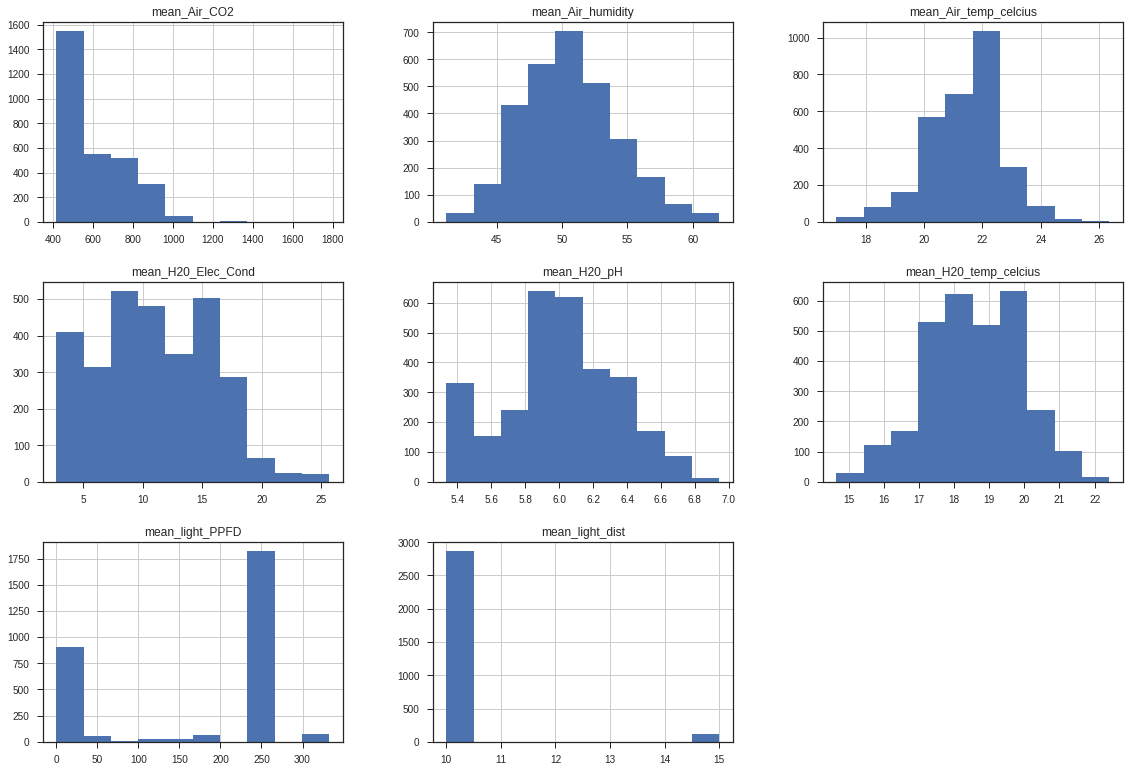

In [0]:
hist=data_mean.drop(["month","day","hour"],axis=1).hist()
plt.subplots_adjust(top=3,bottom=0.5,left=0.5,right=3)

###### Summary of the histogram results
1. The distribution of the Air CO2 variable is skewed to the right. This implies that over time, the Air CO2 in the PFC was  mostly kept lower. On the other hand, the skewness might highlight the presence of extremely large values (that is, anomolous or outliers). We will further investigate this point later.
2. The distribution of the relative Air humidity looks symmetrical. This implies that over time, the relative air humidity in the PFC was on average kept at about 50%. 
3. The distribution of the air temperature looks (approximately) symmetrical. This implies that over time, the temperature in the PFC was evenly distributed. Although there are some extreme temperatures, these rarely occur.
4. The distribution of the water electrical conductivity is almost uniform, however some skewness (right) is present. Again this might be as a result of anomolous values emanating from sensor reading errors. Further investigations will be carried out later.
5. The distribution of the pH level appears to be symmetric, however, some extreme values are evident from the distribution. It is also important to note that the water was kept fairly acidic over time.

These are the same conclusions drawn earlier from the numerical description of the data.

#### Distributions of the variables across different months

##### Air CO2

In [0]:
for i in range(len(data_mean)):
    if data_mean["month"][i]==5:
        data_mean["month"][i]="May"
    elif data_mean["month"][i]==6:
         data_mean["month"][i]="June"
    elif data_mean["month"][i]==7:
         data_mean["month"][i]="July"
    elif data_mean["month"][i]==8:
         data_mean["month"][i]="August"
    elif data_mean["month"][i]==9:
         data_mean["month"][i]="September"

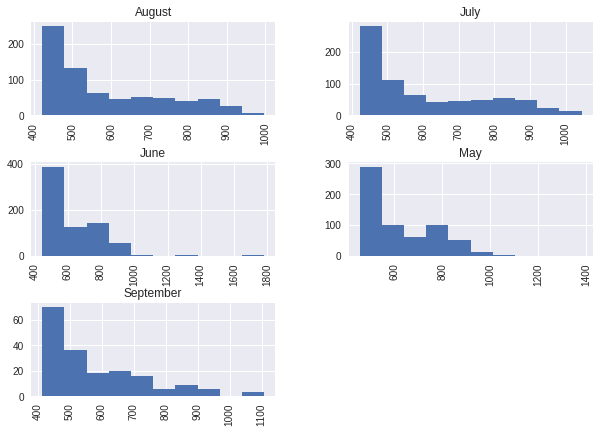

In [0]:
fig=data_mean["mean_Air_CO2"].hist(by=data_mean["month"])
plt.subplots_adjust(top=1.5,bottom=0.2,left=0.2,right=1.5)

##### Air humidity

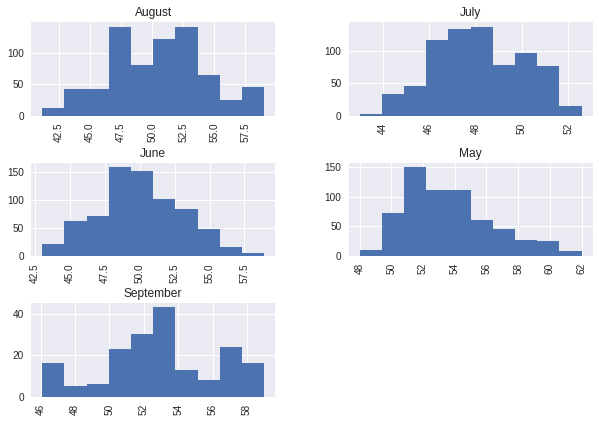

In [0]:
fig=data_mean["mean_Air_humidity"].hist(by=data_mean["month"])
plt.subplots_adjust(top=1.5,bottom=0.2,left=0.2,right=1.5)

##### Air temperature

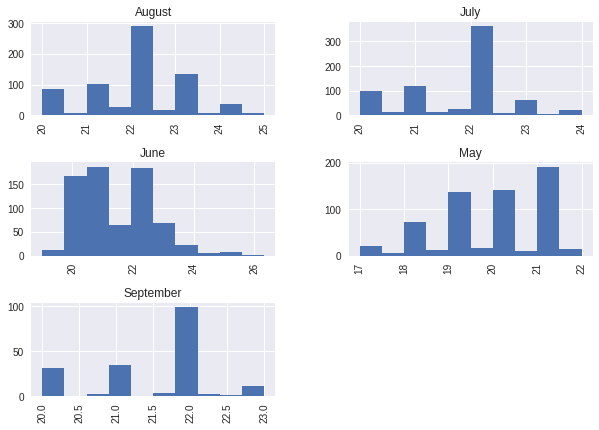

In [0]:
fig=data_mean["mean_Air_temp_celcius"].hist(by=data_mean["month"])
plt.subplots_adjust(top=1.5,bottom=0.2,left=0.2,right=1.5)

##### Light distance

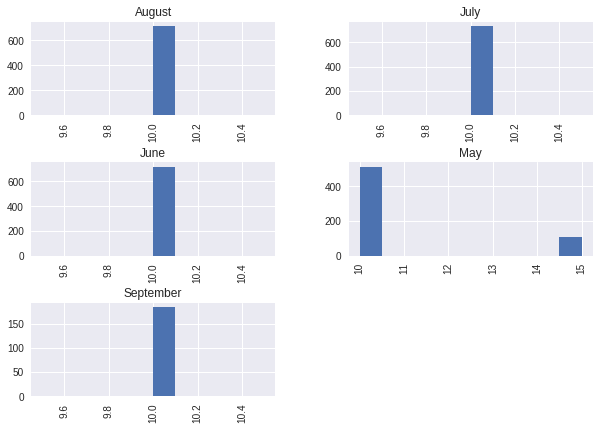

In [0]:
fig=data_mean["mean_light_dist"].hist(by=data_mean["month"])
plt.subplots_adjust(top=1.5,bottom=0.2,left=0.2,right=1.5)

##### Light PPFD

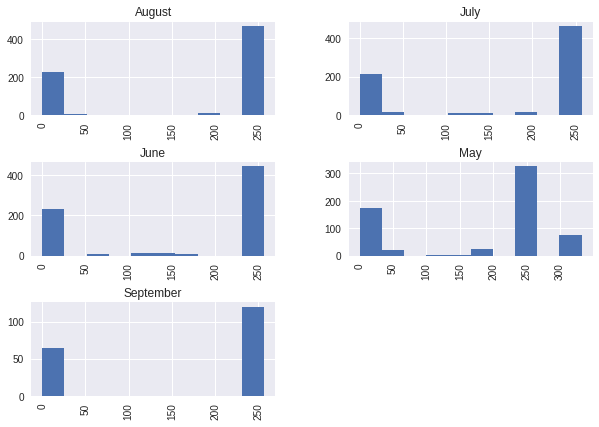

In [0]:
fig=data_mean["mean_light_PPFD"].hist(by=data_mean["month"])
plt.subplots_adjust(top=1.5,bottom=0.2,left=0.2,right=1.5)

##### Water electrical conductivity

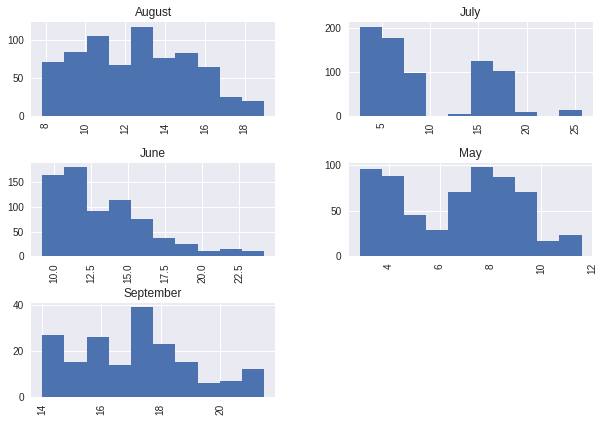

In [0]:
fig=data_mean["mean_H20_Elec_Cond"].hist(by=data_mean["month"])
plt.subplots_adjust(top=1.5,bottom=0.2,left=0.2,right=1.5)

##### Water pH level

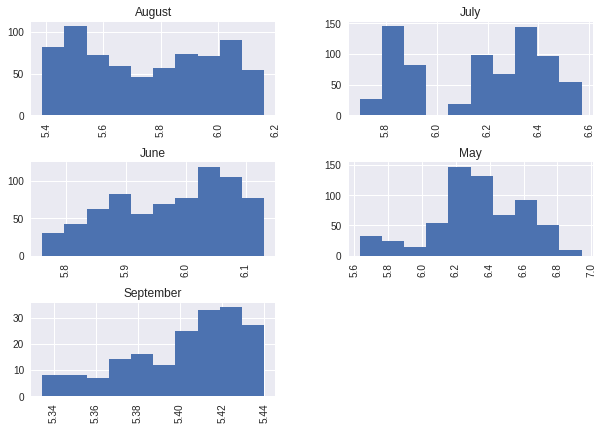

In [0]:
fig=data_mean["mean_H20_pH"].hist(by=data_mean["month"])
plt.subplots_adjust(top=1.5,bottom=0.2,left=0.2,right=1.5)

##### Water temperature

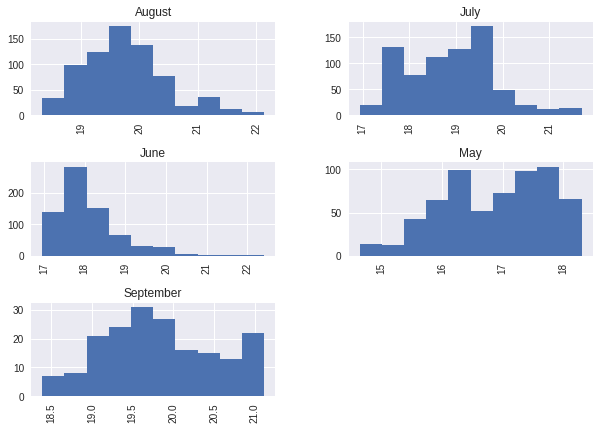

In [0]:
fig=data_mean["mean_H20_temp_celcius"].hist(by=data_mean["month"])
plt.subplots_adjust(top=1.5,bottom=0.2,left=0.2,right=1.5)

## Associations

In [0]:
corr=data_mean.corr()
corr

,month,day,hour,mean_Air_CO2,mean_Air_humidity,mean_Air_temp_celcius,mean_light_dist,mean_light_PPFD,mean_H20_Elec_Cond,mean_H20_pH,mean_H20_temp_celcius
month,1.000000,-0.228983,-0.001544,-0.096177,-0.194427,0.488976,-0.275101,-0.027044,0.422410,-0.637318,0.769711
day,-0.228983,1.000000,0.005059,-0.022000,0.073218,0.053210,-0.172577,-0.014601,-0.038517,0.003203,0.083139
hour,-0.001544,0.005059,1.000000,0.585821,-0.102960,0.195736,-0.019295,0.309167,-0.017288,-0.003522,0.084961
mean_Air_CO2,-0.096177,-0.022000,0.585821,1.000000,-0.277453,0.338698,0.026187,0.592933,-0.090237,0.091398,0.109301
mean_Air_humidity,-0.194427,0.073218,-0.102960,-0.277453,1.000000,-0.699196,0.229043,-0.466748,-0.033584,-0.078806,-0.444647
mean_Air_temp_celcius,0.488976,0.053210,0.195736,0.338698,-0.699196,1.000000,-0.243939,0.518491,0.299766,-0.314375,0.817341
mean_light_dist,-0.275101,-0.172577,-0.019295,0.026187,0.229043,-0.243939,1.000000,0.107046,-0.319094,0.404276,-0.293723
mean_light_PPFD,-0.027044,-0.014601,0.309167,0.592933,-0.466748,0.518491,0.107046,1.000000,-0.065274,0.056938,0.176773
mean_H20_Elec_Cond,0.422410,-0.038517,-0.017288,-0.090237,-0.033584,0.299766,-0.319094,-0.065274,1.000000,-0.846231,0.256235
mean_H20_pH,-0.637318,0.003203,-0.003522,0.091398,-0.078806,-0.314375,0.404276,0.056938,-0.846231,1.000000,-0.439769


The matrix above gives the correlation matrix quantifying the linear association between the variables measured from the PFC. We will now higlight the most important associations (correlation>=+/-0.59):
1. The amount of CO2 (in parts per million (ppm)) in the air is positively 
associated with the amount of light that the plant actually receives. This implies that the more the CO2 in the air the more light the plant will receive, vis a vis.
2. The air temperature (in celcius) is negatively associated with the humidity level in the air. This implies that the greater the temperature the less humid the air will be, vis a vis. 
3. The air temperature (in celcius) is (positively)strongly associated with the water temperature(in celcius). This implies that the greater the water temperature the greater will be the air temperature, vis a vis.
4. The Water electrical conductivity is (negatively)strongly associated with the water pH level. This implies that the more electrical current the water can carry the lower the water's pH level, vis a vis.
    
The "vis a vis" is included to signify that correlation does not mean causation. If two variables are correlated, it does not neccesarily mean that one variable influences the other. The causality between the two variables will depend on, among others, two things:
  

*   Which variable is endogenous (controllable) and which is exogenous (uncontrollable); and
*   Whether the relationship imposed makes sense, that is, it is consistent with the existing theory.

  

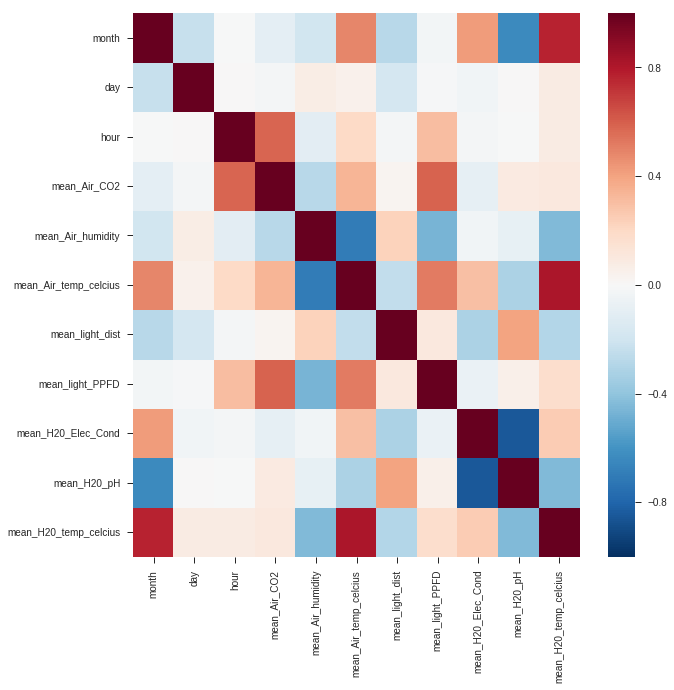

In [0]:
###Correlation plot
plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmin=-1,vmax=1,center=0)

The plot above is a visual interpretation of the above correlation matrix. It is obvious to map the associations from this plot.

/opt/sasinside/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


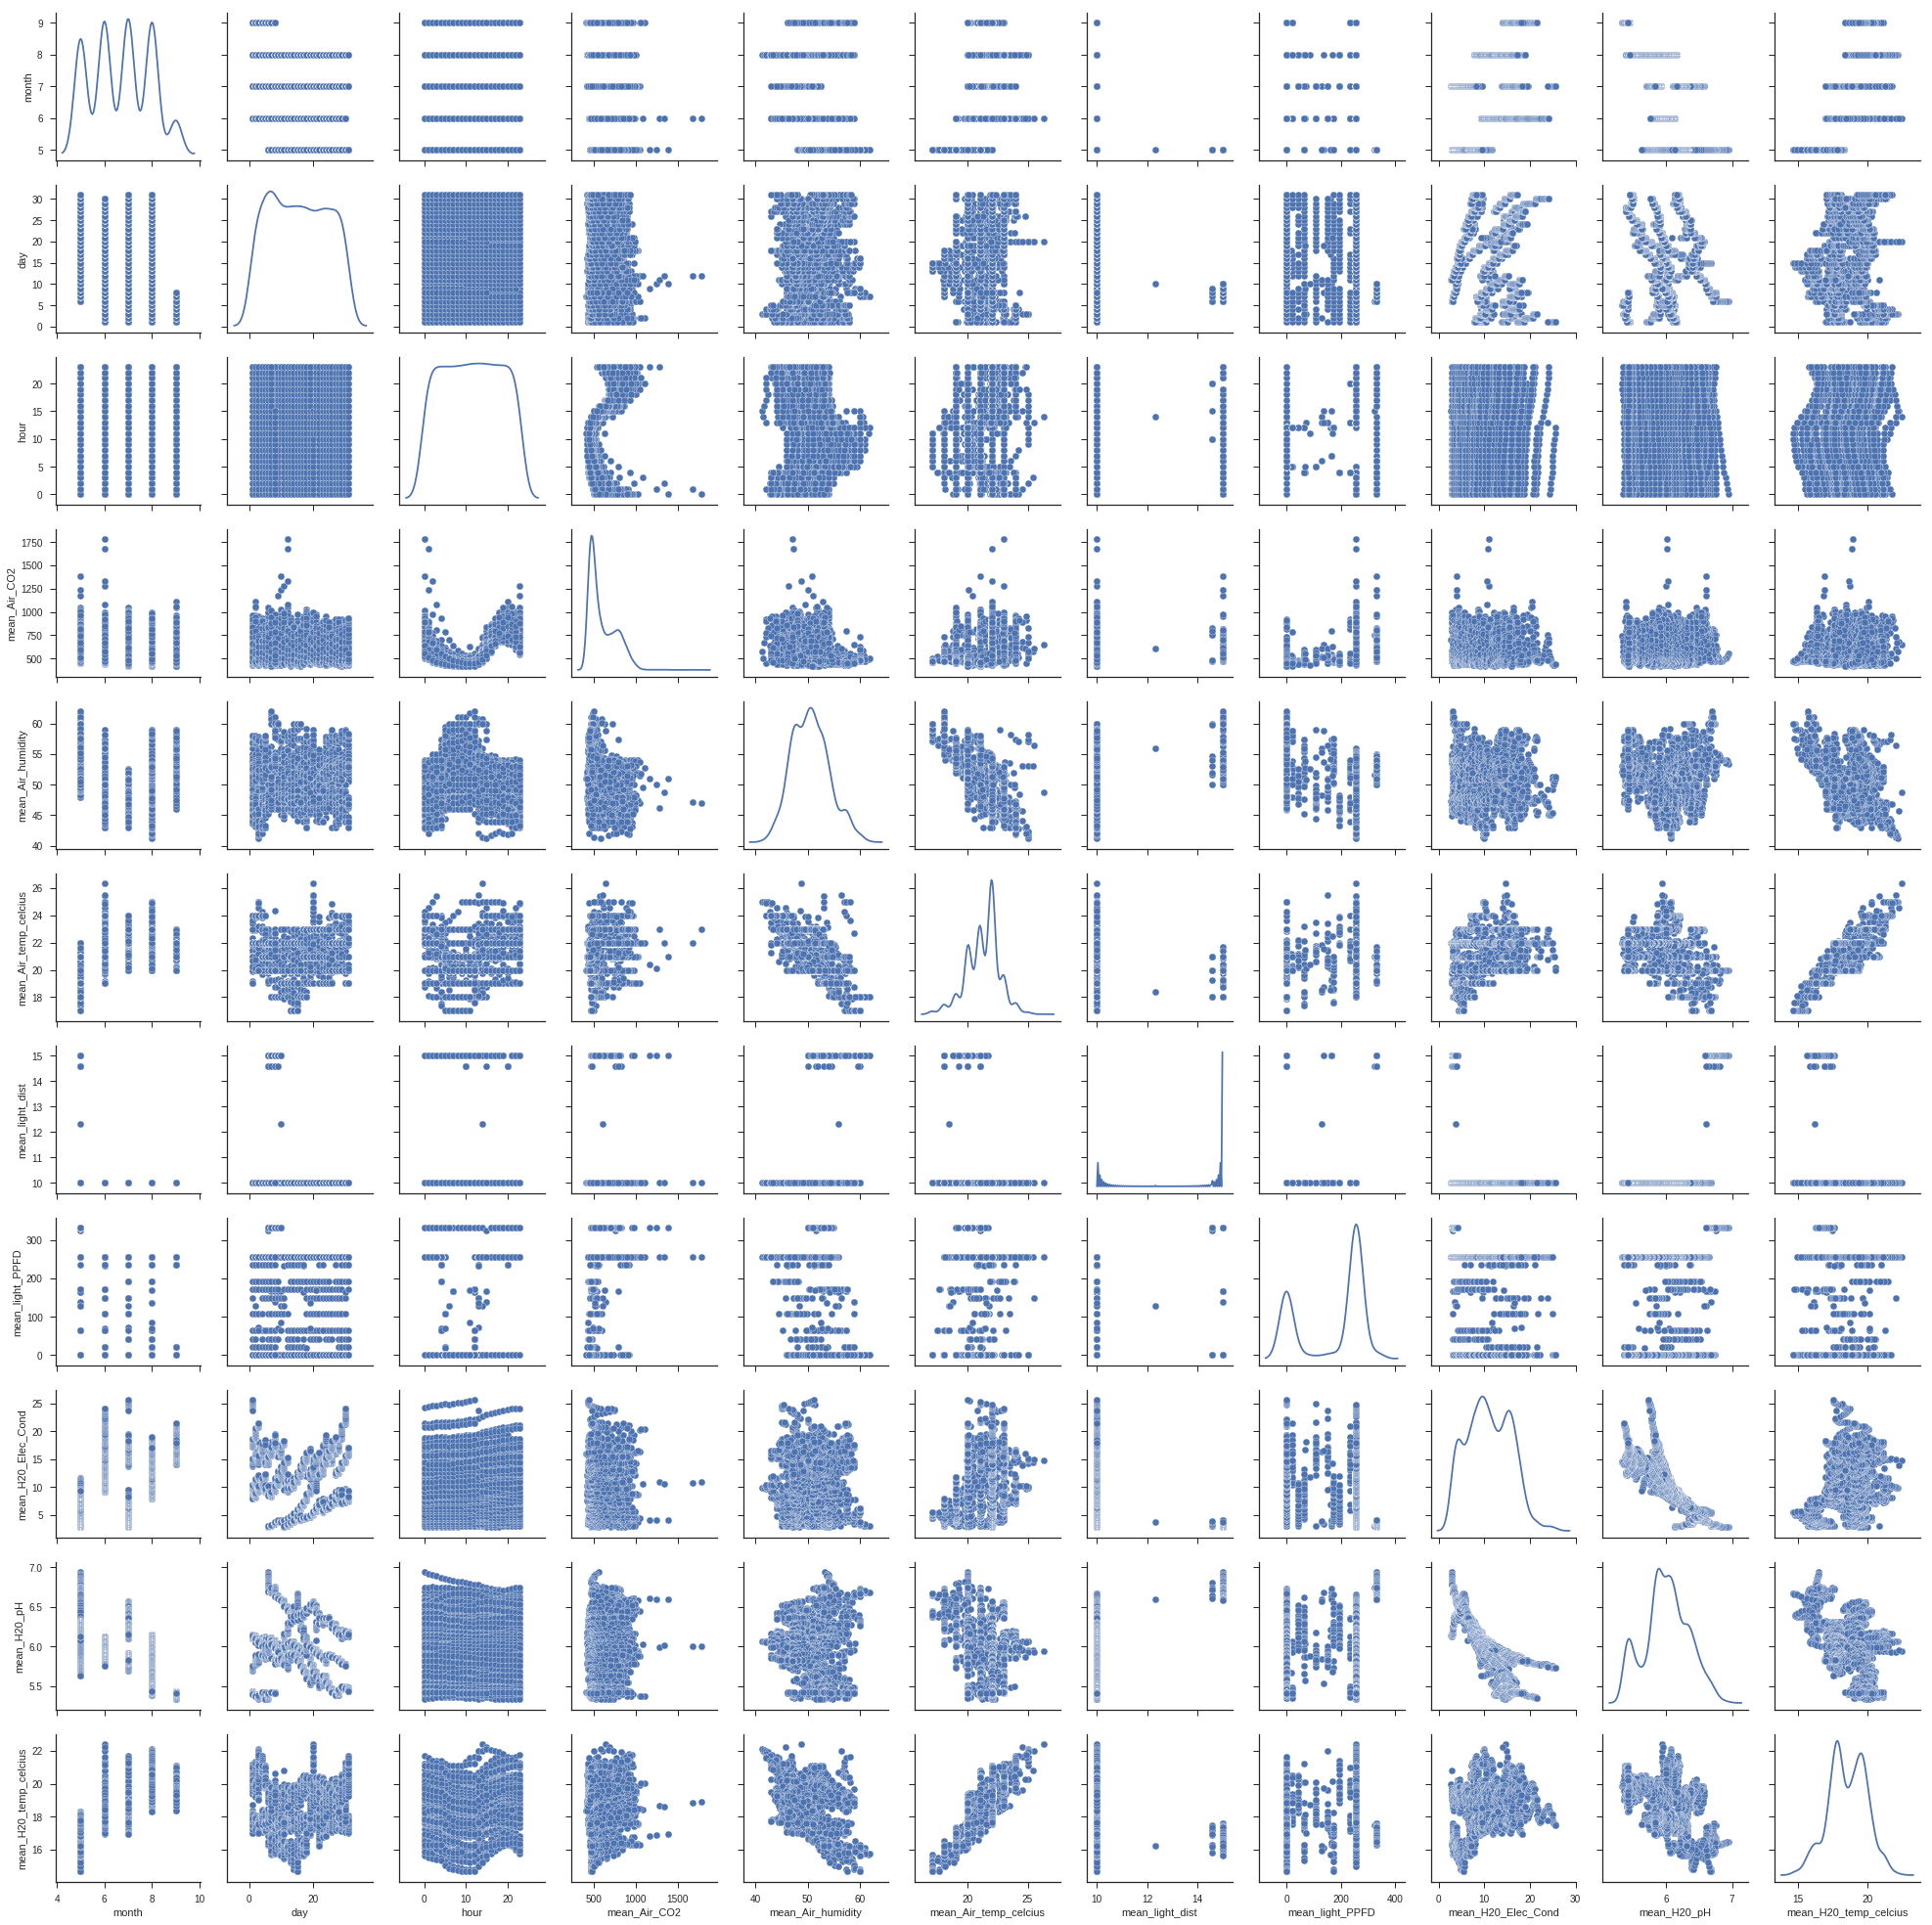

In [0]:
###Scatterplot matrix
sns.set(style="ticks")
sns.pairplot(data_mean,diag_kind='kde')

The plot above is a scatter plot matrix of the data. The off-diagonal plots are the pairwise scatter plots between the variables, and the diagonal plots give the histogram (frequency plot) of the corresponding variable.

/opt/sasinside/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/opt/sasinside/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/sasinside/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


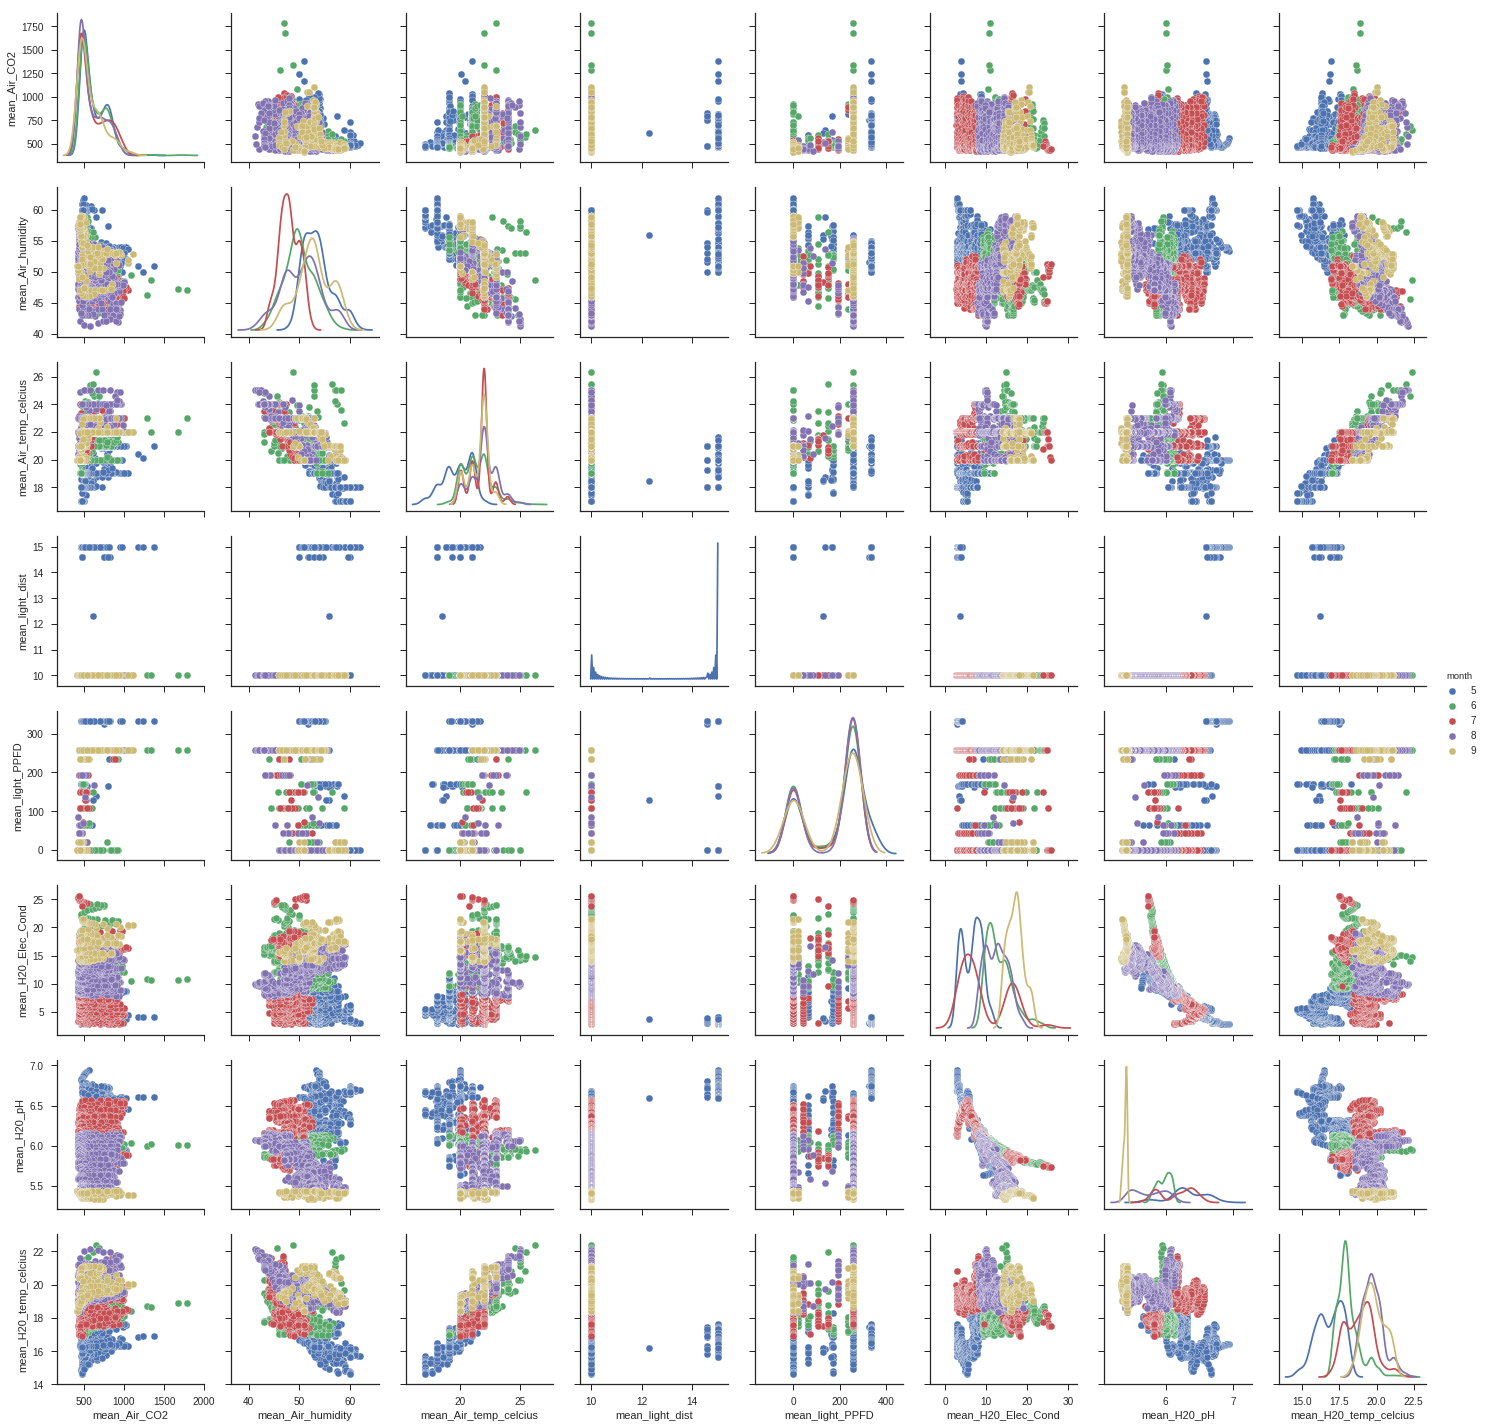

In [0]:
###The Scatterplot matrix at different months
varn=data_mean.columns[3:len(data_mean.columns)]
sns.pairplot(data_mean,vars=varn,hue="month",diag_kind="kde")

The above plot displays the scatter plot matrix of the data at different months (from May to September).

## Time series Analysis

KeyError: ignored

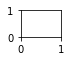

In [49]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
for i in range(7):
    for j in range(7):
        if i!=j:
            plt.subplot(7,7,(i+1)*(j+1))
            ax1.plot(data_mean[["hour"]],data_mean[[i]])
            ax2.plot(data_mean[["hour"]],data_mean[[j]])
plt.show()

In [0]:
%%SAS
###Importing the data
proc import out=data datafile="data_mean.csv"
dbms="csv"
replace;
run;

In [46]:
%%SAS
proc arima data=data plots=;
identify var=mean_Air_CO2;
run;

UsageError: Cell magic `%%SAS` not found.
